# Relatório de Análise VII
---
## Importanto bibiliotecas

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./aluguel_residencial_completo.csv', sep = ';', header= 0)
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [5]:
df['Valor'].mean()

5046.172821405663

In [9]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = df['Bairro'].isin(bairros)
df = df[selecao]

In [7]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [10]:
grupo_bairro = df.groupby(df['Bairro'])

In [11]:
grupo_bairro

In [ ]:
grupo_bairro.groups

In [19]:
for bairro, dados in grupo_bairro:
  print('{} -> R$ {:.3f} em média' .format(bairro, dados['Valor'].mean()))

Barra da Tijuca -> R$ 7069.553 em média
Botafogo -> R$ 8791.828 em média
Copacabana -> R$ 4126.677 em média
Flamengo -> R$ 4113.527 em média
Ipanema -> R$ 9352.001 em média
Leblon -> R$ 8746.345 em média
Tijuca -> R$ 2043.520 em média


In [21]:
grupo_bairro[['Valor', 'Area']].mean()

,Valor,Area
Bairro,,
Barra da Tijuca,7069.552938,221.351281
Botafogo,8791.828179,95.101947
Copacabana,4126.677005,114.917171
Flamengo,4113.526611,124.710084
Ipanema,9352.001134,156.387755
Leblon,8746.344992,157.441176
Tijuca,2043.520000,88.986364


In [22]:
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [23]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [24]:
grupo_sexo = alunos.groupby(alunos['Sexo'])

In [31]:
notas = grupo_sexo['Notas'].mean().round(2)

In [32]:
data_frame_media_notas = pd.DataFrame(data= notas)
data_frame_media_notas.columns = ['Nota Média']

In [33]:
data_frame_media_notas

,Nota Média
Sexo,
F,5.82
M,7.12


In [36]:
grupo_bairro['Valor'].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.552938,11874.152437,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.828179,152202.407611,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.677005,3611.409544,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.526611,3839.125142,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.001134,8219.718352,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.344992,7004.042810,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.520000,1664.337667,750.0,1500.0,1800.0,2300.0,45000.0


In [37]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [40]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum' : 'Somatório'})

,Mínimo,Máximo,Somatório
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

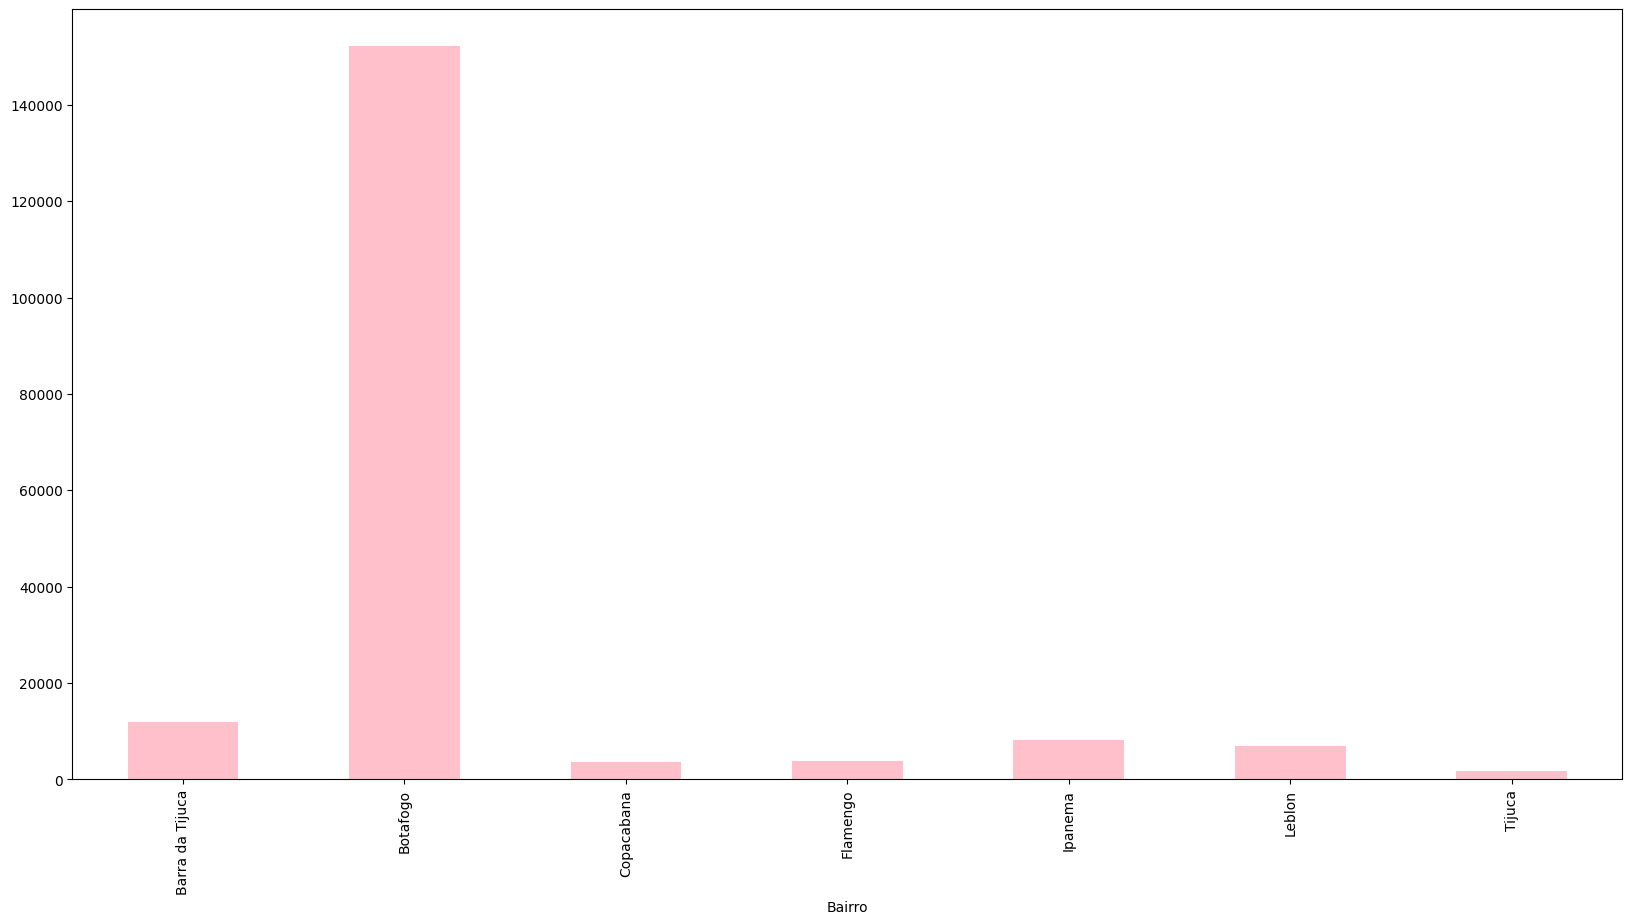

In [43]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'pink')

In [44]:
fig.set_ylabel('Valor do Aluguel')

Text(4.444444444444452, 0.5, 'Valor do Aluguel')

In [45]:
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

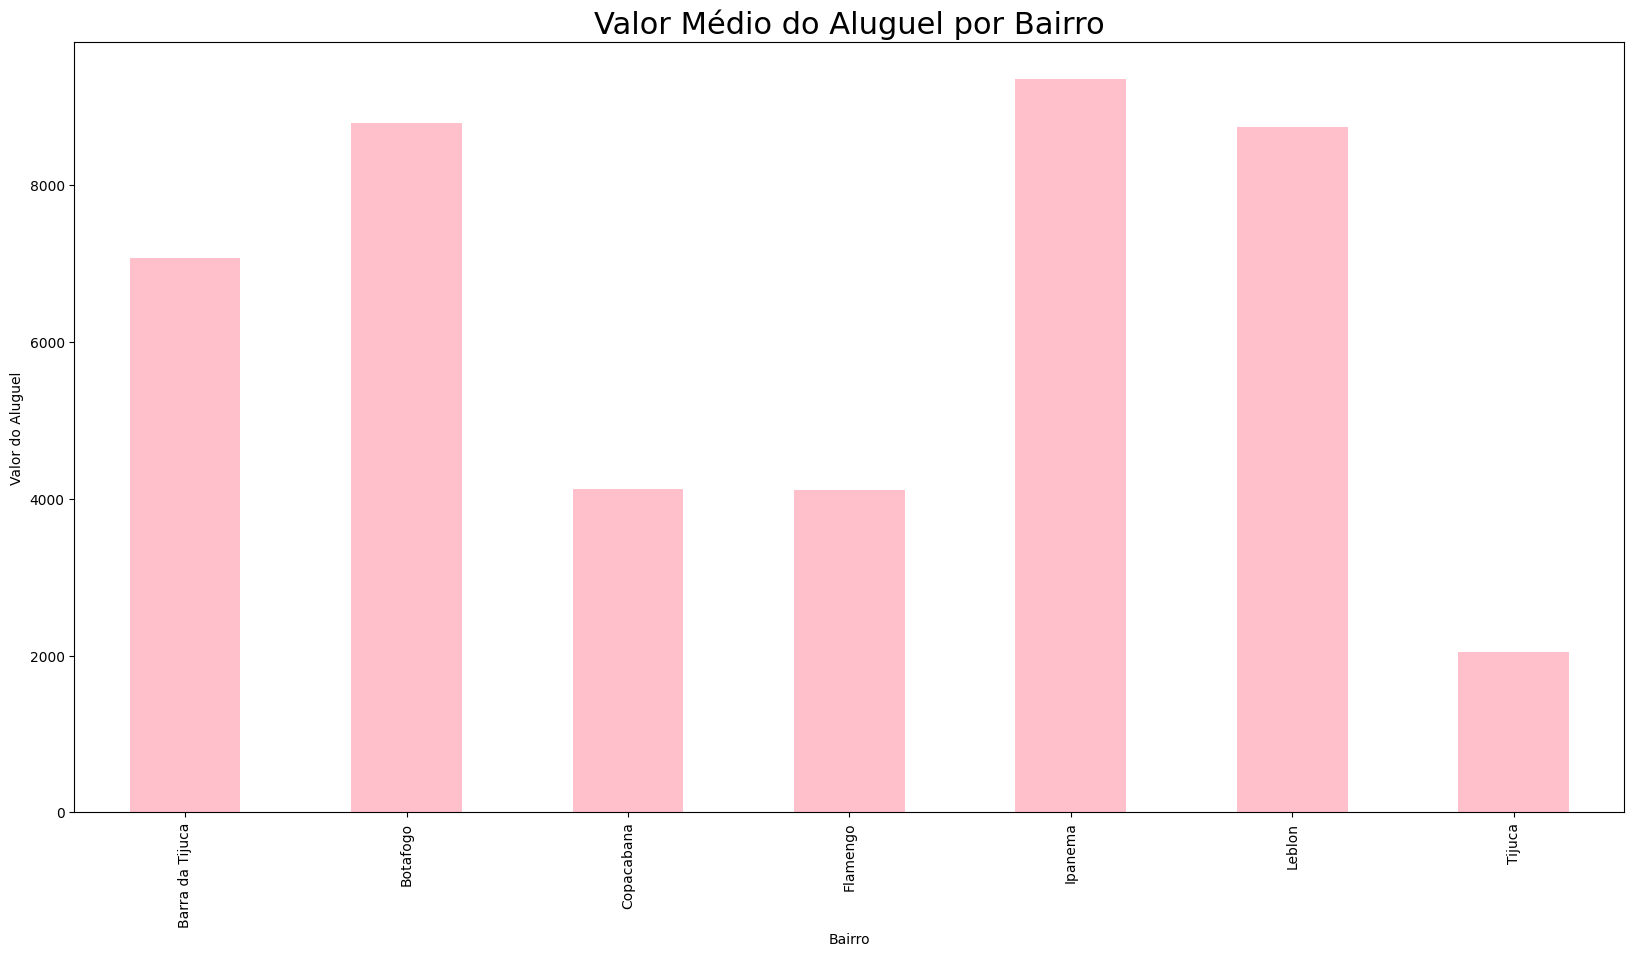

In [52]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'pink')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [53]:
type(fig)

matplotlib.axes._axes.Axes

In [55]:
prices = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
prices

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [56]:
produtos = prices.groupby(prices['Produto'], axis= 0, sort= False)

In [58]:
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [59]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2
